In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import re

In [3]:
# Load dataset
df = pd.read_csv("Drug_Data.csv").dropna()

In [4]:
df.shape

(100526, 9)

In [5]:
df.Drug.unique()

array(['Levofloxacin', 'Moxifloxacin', 'Azithromycin',
       'Amoxicillin-Pot Clavulanate', 'Amoxicillin', 'Clarithromycin',
       'Erythromycin', 'Ampicillin', 'Erythromycin Stearate',
       'Erythromycin Ethylsuccinate', 'Moxifloxacin-Sod.Chloride(Iso)',
       'Ampicillin Sodium', 'Capecitabine', 'Cisplatin', 'Oxaliplatin',
       'Paclitaxel-Protein Bound', 'Gemcitabine', 'Fluorouracil',
       'Mitomycin', 'Doxorubicin', 'Prednisone', 'Methylprednisolone',
       'Cetirizine', 'Triamcinolone Acetonide', 'Clobetasol',
       'Dexamethasone', 'Methylprednisolone Acetate', 'Pimecrolimus',
       'Fluocinonide', 'Desonide', 'Betamethasone Dipropionate',
       'Tacrolimus', 'Mometasone', 'Hydrocortisone', 'Desoximetasone',
       'Clobetasol-Emollient', 'Hydrocortisone Butyr-Emollient',
       'Halobetasol Propionate', 'Fluocinolone',
       'Vit E-Grape-Hyaluronate Sodium', 'Cortisone',
       'Betamethasone Valerate', 'Betamethasone Acet,Sod Phos',
       'Fluocinolone And Shower

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100526 entries, 0 to 100525
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Condition     100526 non-null  object 
 1   Drug          100526 non-null  object 
 2   Indication    100526 non-null  object 
 3   Type          100526 non-null  object 
 4   Reviews       100526 non-null  object 
 5   Effective     100526 non-null  float64
 6   EaseOfUse     100526 non-null  float64
 7   Satisfaction  100526 non-null  float64
 8   Information   100526 non-null  object 
dtypes: float64(3), object(6)
memory usage: 6.9+ MB


In [7]:
df.isna().sum()

Condition       0
Drug            0
Indication      0
Type            0
Reviews         0
Effective       0
EaseOfUse       0
Satisfaction    0
Information     0
dtype: int64

In [8]:
df["Reviews"] = df["Reviews"].str.extract(r"(\d+)").astype(float); model = LinearRegression().fit(df[["Reviews", "EaseOfUse", "Satisfaction"]], df["Effective"]); df["Predicted_Effectiveness"] = model.predict(df[["Reviews", "EaseOfUse", "Satisfaction"]])
df[["Drug", "Predicted_Effectiveness"]].drop_duplicates().nlargest(5, "Predicted_Effectiveness")

,Drug,Predicted_Effectiveness
47526,Nadolol,4.964337
18371,Clotrimazole,4.962707
16491,Famotidine,4.962659
34062,Cetirizine,4.962480
87653,Trolamine Salicylate,4.962453


In [9]:
# Clean 'Reviews' column by extracting numeric values if it exists
if 'Reviews' in df.columns:
    df['Reviews'] = df['Reviews'].astype(str).str.extract(r'(\d+)')[0].astype(float).fillna(0)

In [10]:
# Encode categorical variables
categorical_cols = ['Condition', 'Drug', 'Indication', 'Type']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [11]:
# Ensure all data is numeric before scaling
X, y = df.drop(columns=['Satisfaction']), df['Satisfaction']
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

In [12]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

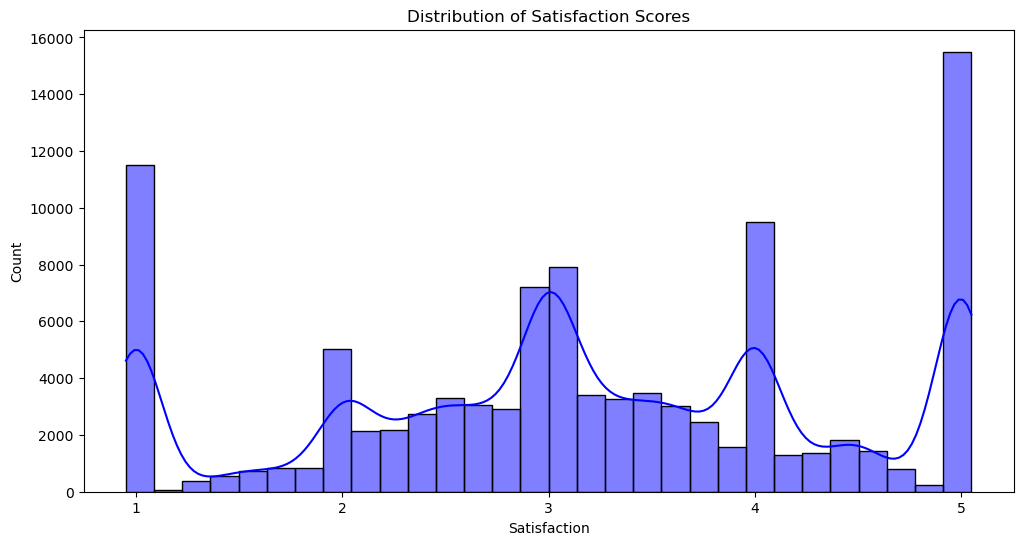

In [14]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.histplot(df['Satisfaction'], bins=30, kde=True, color='blue')
plt.title("Distribution of Satisfaction Scores")
plt.xlabel("Satisfaction")
plt.ylabel("Count")
plt.show()

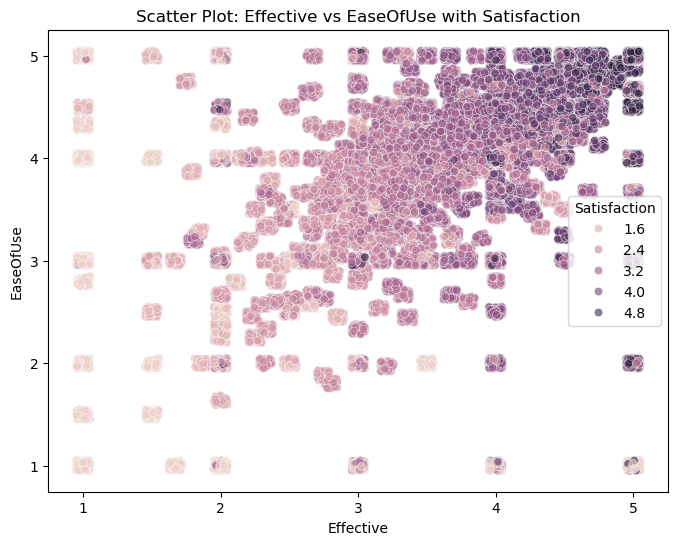

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Effective'], y=df['EaseOfUse'], hue=df['Satisfaction'], alpha=0.6)
plt.title("Scatter Plot: Effective vs EaseOfUse with Satisfaction")
plt.xlabel("Effective")
plt.ylabel("EaseOfUse")
plt.show()

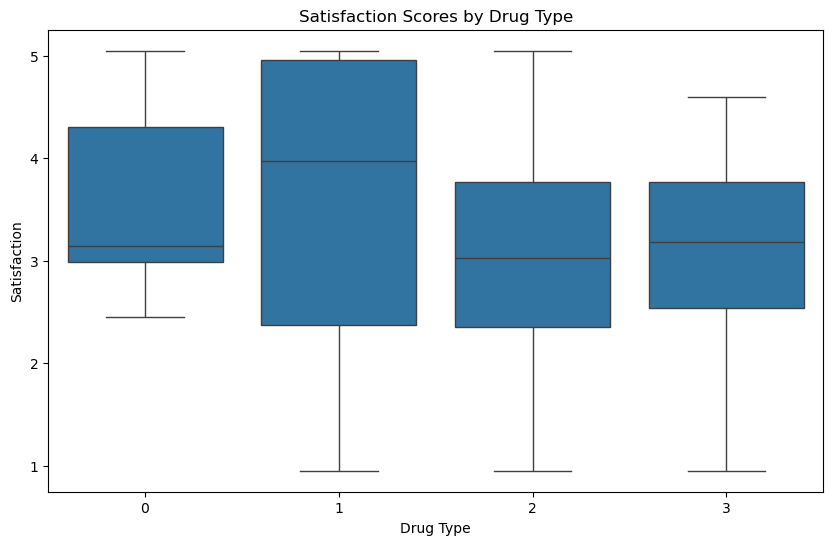

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Type'], y=df['Satisfaction'])
plt.title("Satisfaction Scores by Drug Type")
plt.xlabel("Drug Type")
plt.ylabel("Satisfaction")
plt.show()

In [17]:
# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results[name] = {
        "R²": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }
    print(f"{name}: R² = {model_results[name]['R²']:.4f}, RMSE = {model_results[name]['RMSE']:.4f}")

Linear Regression: R² = 1.0000, RMSE = 0.0000
Decision Tree: R² = 1.0000, RMSE = 0.0085
Random Forest: R² = 1.0000, RMSE = 0.0059
Gradient Boosting: R² = 0.9988, RMSE = 0.0426


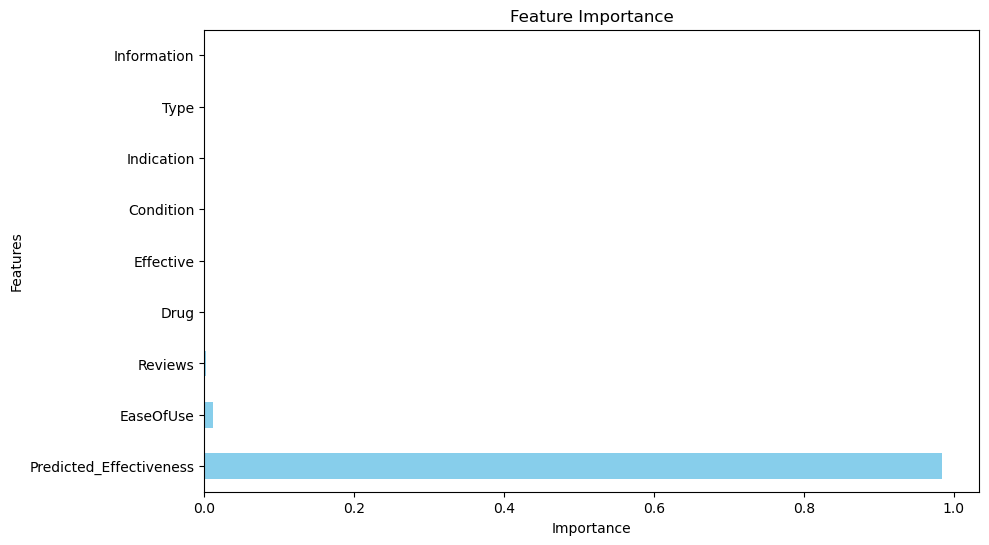

In [18]:
# Plot feature importance from Random Forest
rf_model = models["Random Forest"]
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

C:\Users\bhavya\AppData\Local\Temp\ipykernel_6236\136289382.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rmse_values, y=model_names, palette="viridis")


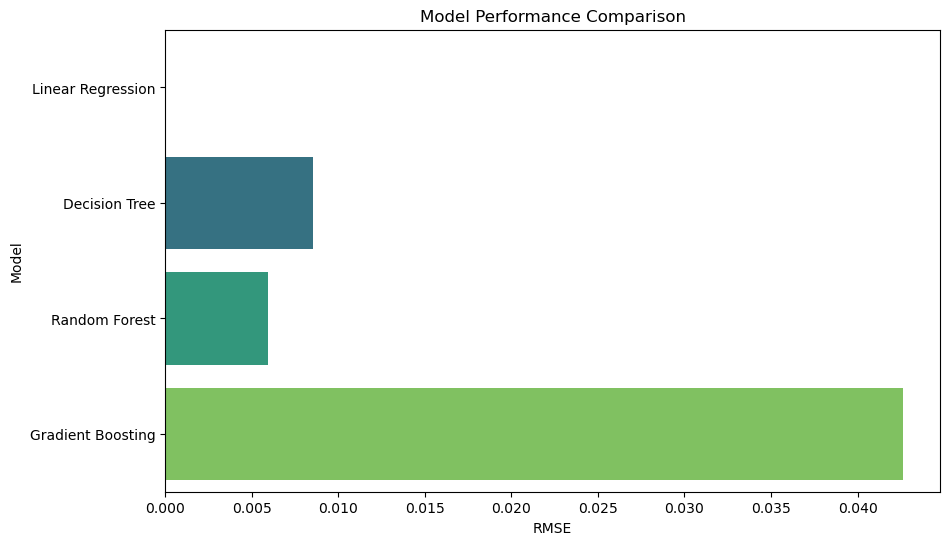

In [19]:
# Visualize model performance
plt.figure(figsize=(10, 6))
model_names = list(model_results.keys())
rmse_values = [model_results[name]["RMSE"] for name in model_names]
sns.barplot(x=rmse_values, y=model_names, palette="viridis")
plt.xlabel("RMSE")
plt.ylabel("Model")
plt.title("Model Performance Comparison")
plt.show()

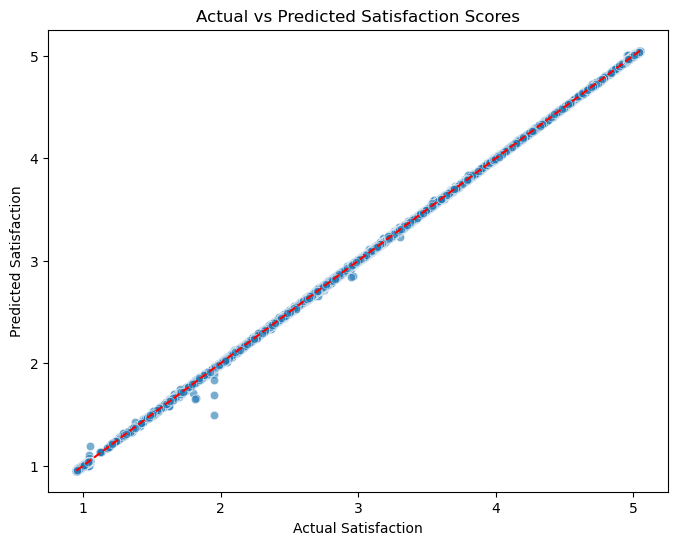

In [20]:
# Scatter plot of actual vs predicted values
y_pred_best = models["Random Forest"].predict(X_test)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Satisfaction")
plt.ylabel("Predicted Satisfaction")
plt.title("Actual vs Predicted Satisfaction Scores")
plt.show()

In [21]:
# Sample dataset (replace with actual data)
np.random.seed(42)
data = {
    'Effective': np.random.randint(1, 6, 500),
    'EaseOfUse': np.random.randint(1, 6, 500),
    'Satisfaction': np.random.randint(1, 6, 500)
}

df = pd.DataFrame(data)

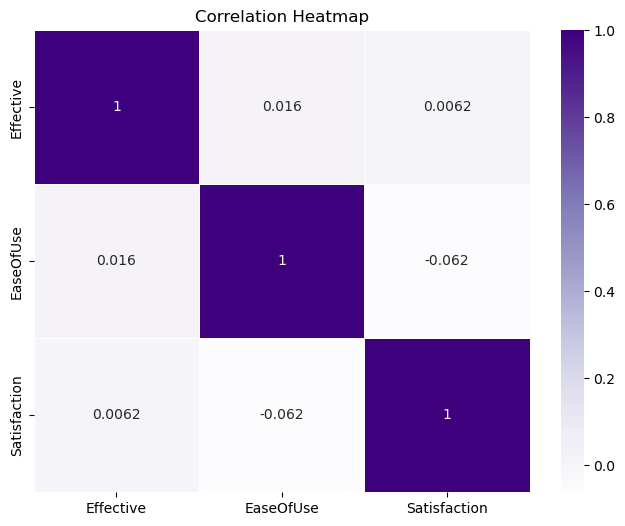

In [22]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='Purples', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

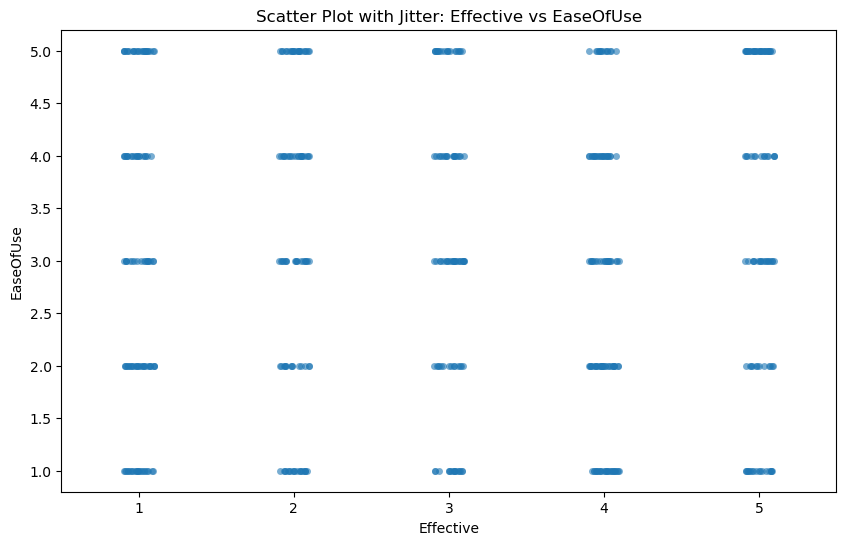

In [23]:
# Scatter plot with jitter
plt.figure(figsize=(10, 6))
sns.stripplot(x=df['Effective'], y=df['EaseOfUse'], jitter=True, alpha=0.6)
plt.xlabel("Effective")
plt.ylabel("EaseOfUse")
plt.title("Scatter Plot with Jitter: Effective vs EaseOfUse")
plt.show()

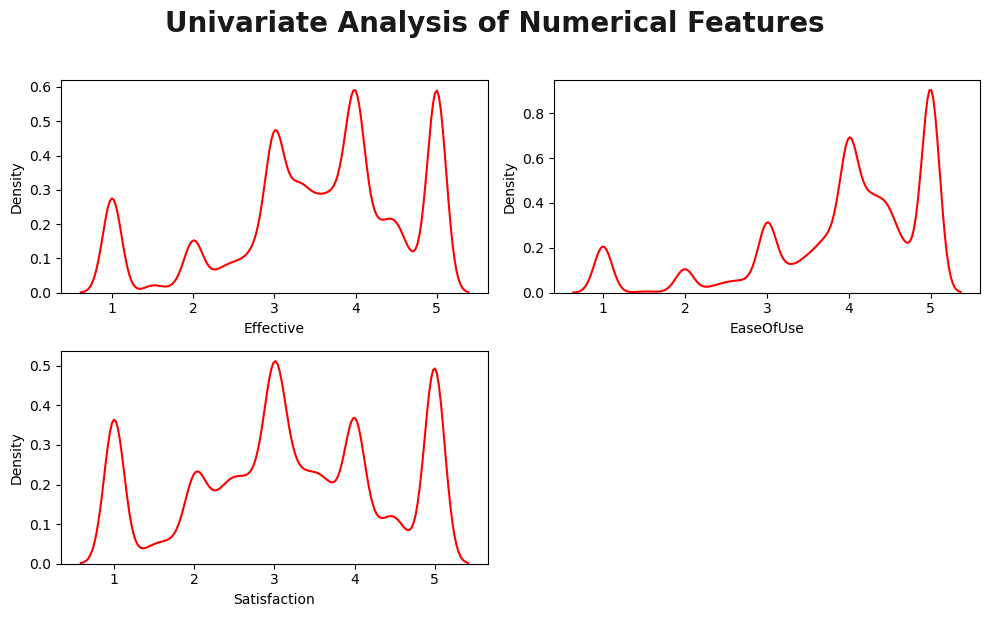

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load the dataset
file_path = r"C:\Users\bhavya\Desktop\git\python-2\project\Drug_Data.csv"
df = pd.read_csv(file_path)

# Define numeric features
numeric_features = ['Effective', 'EaseOfUse', 'Satisfaction']
num_features = len(numeric_features)
rows = math.ceil(num_features / 2)  # Calculate number of rows

# Set figure size dynamically
plt.figure(figsize=(10, 3 * rows))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.9, y=1.02)

# Loop through numerical features and create KDE plots
for i, feature in enumerate(numeric_features):
    plt.subplot(rows, 2, i + 1)  # Arrange in 2 columns
    sns.kdeplot(x=df[feature], color='red')
    plt.xlabel(feature)

plt.tight_layout()  # Apply layout adjustments
plt.show()  # Show the plots


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Define discrete features and target column (update based on dataset)
discrete_features = ['Drug', 'Condition']  # Modify as needed
target = 'Satisfaction'  # Adjust if needed

# Define number of rows and columns for subplots
num_rows = math.ceil(len(discrete_features) / 2)
num_cols = 2  # Always 2 columns (boxplot & histogram)

# Adjust figure size dynamically
fig_width = 15
fig_height = 5 * num_rows

# Create subplots
fig, ax = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height), squeeze=False)
fig.suptitle('Distribution of Discrete Features by Satisfaction', color='#3C3744', fontsize=20, fontweight='bold', ha='center')

# Use Seaborn built-in color palettes
box_palette = "Set2"  # Better scaling for categorical data
hist_palette = "viridis"  # Gradient-based color map

for i, col in enumerate(discrete_features):
    row_index = i // 2  # Row index
    col_index = i % 2   # Column index
    
    # Boxplot (Fix palette issue)
    sns.boxplot(data=df, x=target, y=col, hue=target, palette=box_palette, legend=False, ax=ax[row_index, col_index])
    ax[row_index, col_index].set_title(f'Boxplot of {col} vs {target}', fontsize=12)
    
    # Histogram (Fix hue issue)
    sns.histplot(data=df, x=col, hue=target, multiple='stack', palette=hist_palette, ax=ax[row_index, col_index])
    ax[row_index, col_index].set_title(f'Histogram of {col}', fontsize=14)

# Remove unused subplots dynamically
for i in range(len(discrete_features), num_rows * num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    fig.delaxes(ax[row_index, col_index])

fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()
